# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import api_keys
import random
import gmaps
import json
import os

# Import API key and tools

from api_keys import weather_api_key
from citipy import citipy
from pprint import pprint
from scipy import stats

## Generate Cities List

In [11]:
#Generate range
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Save config information
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------


In [13]:
# Loop through the list of cities and perform a request
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=thompson
Processing Record 2 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=jamestown
Processing Record 3 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=vostok
Processing Record 4 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=arraial%20do%20cabo
Processing Record 5 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=dunedin
Processing Record 6 | Mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=mayo
Processing Record 7 | Miles City
http://api.openweathermap.org/data/2.5/weather?

Processing Record 57 | Naviraí
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=navirai
Processing Record 58 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=ilulissat
Processing Record 59 | Sanandij
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=sanandaj
Processing Record 60 | Kuzedeyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=kuzedeyevo
Processing Record 61 | Kologriv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=kologriv
Processing Record 62 | Betioky
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=betioky
Processing Record 63 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc

Processing Record 113 | Alto Araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=alto%20araguaia
Processing Record 114 | Plouzané
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=plouzane
Processing Record 115 | Ifanadiana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=ifanadiana
Processing Record 116 | Sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=sambava
Processing Record 117 | Mahébourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=mahebourg
City not found. Skipping...
Processing Record 118 | Inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=inuvik
Processing Record 119 | Goderich
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 168 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=east%20london
Processing Record 169 | Lubango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=lubango
Processing Record 170 | Hong Kong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=victoria
Processing Record 171 | Severo-Kuril'sk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=severo-kurilsk
Processing Record 172 | Lázaro Cárdenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=lazaro%20cardenas
Processing Record 173 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=khatanga
Processing Record 174 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 223 | Saint-François
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=saint-francois
Processing Record 224 | Greenville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=greenville
Processing Record 225 | Leonding
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=leonding
Processing Record 226 | Gisborne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=gisborne
City not found. Skipping...
Processing Record 227 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=mount%20gambier
City not found. Skipping...
Processing Record 228 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=new%20norfolk
City not found. Skipping...
Processing

Processing Record 279 | Liwonde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=liwonde
Processing Record 280 | Yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=yeppoon
Processing Record 281 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=egvekinot
Processing Record 282 | Houma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=houma
Processing Record 283 | Duki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=duki
Processing Record 284 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=sitka
Processing Record 285 | Sørland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=sorland
Processin

City not found. Skipping...
Processing Record 335 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=evensk
Processing Record 336 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=tessalit
Processing Record 337 | Catalina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=catalina
Processing Record 338 | Kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=kodinsk
Processing Record 339 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=lavrentiya
Processing Record 340 | Ereymentau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=ereymentau
Processing Record 341 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a0

Processing Record 390 | Vallenar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=vallenar
Processing Record 391 | Manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=manokwari
Processing Record 392 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=aksarka
Processing Record 393 | Trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=trairi
Processing Record 394 | El Alto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=el%20alto
Processing Record 395 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=ostrovnoy
Processing Record 396 | Kulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=

Processing Record 447 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=mount%20isa
Processing Record 448 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=bonthe
Processing Record 449 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=bilma
Processing Record 450 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=geraldton
Processing Record 451 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=saldanha
Processing Record 452 | Manono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=manono
Processing Record 453 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=fl

Processing Record 504 | Tombouctou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=tombouctou
Processing Record 505 | Cap Malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=cap%20malheureux
Processing Record 506 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=mehamn
Processing Record 507 | Morro Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=morro%20bay
Processing Record 508 | Conakry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=conakry
Processing Record 509 | Kikwit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=kikwit
Processing Record 510 | Senador José Porfírio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a

Processing Record 560 | Kedrovyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=kedrovyy
Processing Record 561 | Lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=lufilufi
City not found. Skipping...
Processing Record 562 | Peniche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=peniche
Processing Record 563 | Mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=mayumba
Processing Record 564 | Beidao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=beidao
Processing Record 565 | Serrinha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe6eb5098c404cb5636949fc8f&q=serrinha
Processing Record 566 | Ambovombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a03a1efe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Export the city data into a .csv.
output_data_file = "output_data/cities.csv"

In [42]:
# Build dataFrame with url query    
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame.from_dict(weather_dict, orient="index")
weather_df = weather_data.transpose()
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Thompson,75,CA,1599195240,93,55.74,-97.86,48.2,9.17
1,Jamestown,75,US,1599195070,88,42.1,-79.24,68,10.29
2,Vostok,0,RU,1599195227,43,46.49,135.88,78.19,11.12
3,Arraial do Cabo,0,BR,1599195110,86,-22.97,-42.03,70.41,16.96
4,Dunedin,100,NZ,1599195118,57,-45.87,170.5,55,3
...,...,...,...,...,...,...,...,...,...
567,Tucupita,99,VE,1599195482,96,9.06,-62.05,71.98,1.88
568,Tolland,90,US,1599195483,83,41.85,-72.35,72,2.57
569,Klaksvík,50,FO,1599195483,87,62.23,-6.59,50,20.8
570,Pathein,94,MM,1599195484,63,16.78,94.73,90.61,2.53


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
# Display stats of weather data and inspect values 
weather_df.describe(include='all')

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,572,572,572,572,572,572.00,572.00,572.0,572.00
unique,572,94,120,303,86,556.00,569.00,338.0,295.00
top,Chālūs,0,RU,1599195258,93,57.05,-53.46,59.0,5.82
freq,1,92,67,5,36,2.00,2.00,17.0,25.00


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

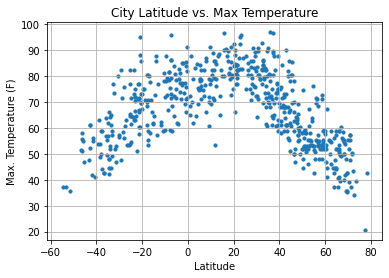

In [53]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

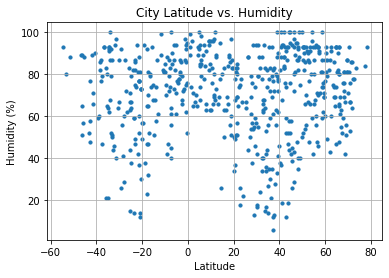

In [54]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

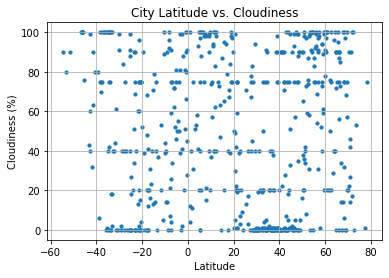

In [50]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

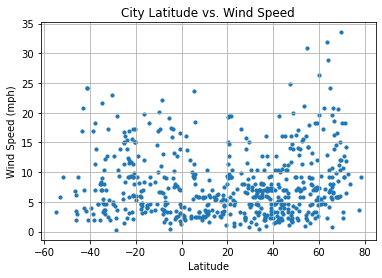

In [55]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


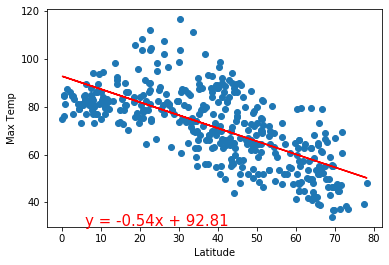

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


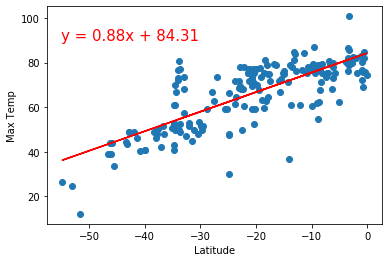

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


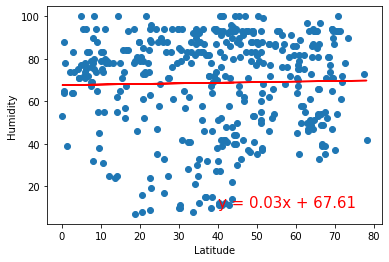

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


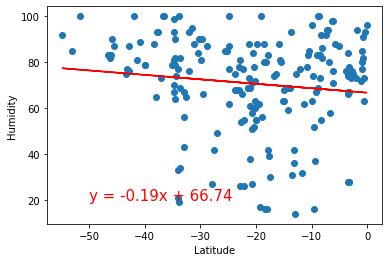

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


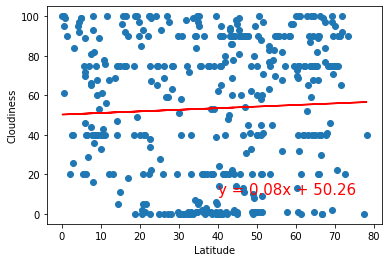

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


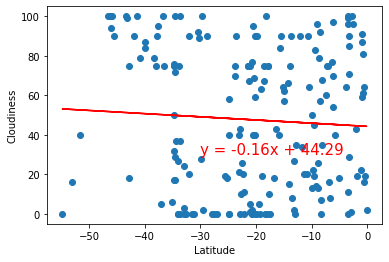

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


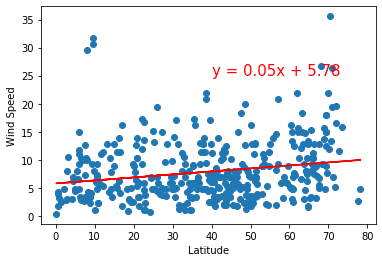

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


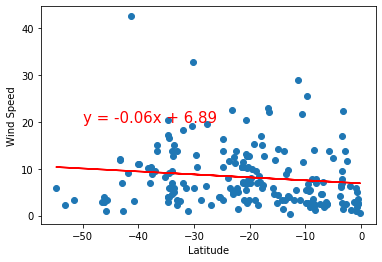